In [1]:
%matplotlib inline
%matplotlib widget
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

from lsst_efd_client import EfdClient

In [81]:
def print_number_filter(data, start, end, num):
    for threshold in np.linspace(start, end, num):
        data_filter = data[ data<threshold ]
        print(f"Number of points less than {threshold} is {len(data_filter)}")

In [2]:
efd_client = EfdClient("summit_efd")

## Time from Russell

Here is a timestamp (TAI unix seconds): 1667946189.507

In [3]:
time = Time(1667946189.507, format='unix_tai', scale='tai')
time.format = 'fits'
print(time)

2022-11-08T22:23:09.507


Based on the above, use the following time period.

In [4]:
time_start = Time("2022-11-08T22:20:00", scale="utc", format="isot")
time_end = Time("2022-11-08T22:40:00", scale="utc", format="isot")

In [5]:
data_rotation = await efd_client.select_time_series(
        "lsst.sal.MTRotator.rotation",
        fields=["timestamp", "private_sndStamp", "private_rcvStamp"],
        start=time_start,
        end=time_end)

In [6]:
timestamps_controller = np.array(data_rotation.timestamp)
diff_timestamps = np.diff(timestamps_controller)

sndStamp_sal = np.array(data_rotation.private_sndStamp)
diff_sndStamp_sal = np.diff(sndStamp_sal)

rcvStamp_sal = np.array(data_rotation.private_rcvStamp)
diff_rcvStamp_sal = np.diff(rcvStamp_sal)

In [14]:
# Check the difference of time
print("Timestamp difference is")
print(diff_timestamps)

print(f"Number of points is {len(diff_timestamps)}")

# Check the limit values
print(f"Max is {np.max(diff_timestamps)}")
print(f"Min is {np.min(diff_timestamps)}")

Timestamp difference is
[0.04999804 0.04999781 0.04999804 ... 0.04999804 0.04999828 0.04999804]
Number of points is 23571
Max is 7.555710554122925
Min is 0.04999661445617676


In [50]:
print("SAL Sending timestamp difference is")
print(diff_sndStamp_sal)

print(f"Number of points is {len(diff_sndStamp_sal)}")

print(f"Max is {np.max(diff_sndStamp_sal)}")
print(f"Min is {np.min(diff_sndStamp_sal)}")

SAL Sending timestamp difference is
[0.05001712 0.05000401 0.05001235 ... 0.04999685 0.05001807 0.05000925]
Number of points is 23571
Max is 7.051286935806274
Min is 0.048413991928100586


In [90]:
print("SAL Receiving timestamp difference is")
print(diff_rcvStamp_sal)

print(f"Number of points is {len(diff_rcvStamp_sal)}")

print(f"Max is {np.max(diff_rcvStamp_sal)}")
print(f"Min is {np.min(diff_rcvStamp_sal)}")

SAL Receiving timestamp difference is
[0.04998088 0.05002737 0.04999804 ... 0.04999542 0.05002379 0.05000591]
Number of points is 23571
Max is 7.051229953765869
Min is 0.04105877876281738


In [92]:
# Check the threshold
print_number_filter(diff_timestamps, 0.08, 0.6, 10)

# Filter out the weird values
diff_timestamps_filter = diff_timestamps[(diff_timestamps<0.1)]

print(f"Number of points is {len(diff_timestamps_filter)}")

# Check the limit values again
print(f"Max is {np.max(diff_timestamps_filter)}")
print(f"Min is {np.min(diff_timestamps_filter)}")

Number of points less than 0.08 is 23554
Number of points less than 0.13777777777777778 is 23554
Number of points less than 0.19555555555555557 is 23554
Number of points less than 0.25333333333333335 is 23555
Number of points less than 0.3111111111111111 is 23555
Number of points less than 0.36888888888888893 is 23555
Number of points less than 0.4266666666666667 is 23555
Number of points less than 0.4844444444444445 is 23555
Number of points less than 0.5422222222222223 is 23556
Number of points less than 0.6 is 23556
Number of points is 23554
Max is 0.05024862289428711
Min is 0.04999661445617676


In [93]:
print_number_filter(diff_sndStamp_sal, 0.08, 0.6, 10)

diff_sndStamp_sal_filter = diff_sndStamp_sal[(diff_sndStamp_sal<0.09)]

print(f"Number of points is {len(diff_sndStamp_sal_filter)}")

print(f"Max is {np.max(diff_sndStamp_sal_filter)}")
print(f"Min is {np.min(diff_sndStamp_sal_filter)}")

Number of points less than 0.08 is 23553
Number of points less than 0.13777777777777778 is 23554
Number of points less than 0.19555555555555557 is 23554
Number of points less than 0.25333333333333335 is 23555
Number of points less than 0.3111111111111111 is 23555
Number of points less than 0.36888888888888893 is 23555
Number of points less than 0.4266666666666667 is 23555
Number of points less than 0.4844444444444445 is 23555
Number of points less than 0.5422222222222223 is 23556
Number of points less than 0.6 is 23556
Number of points is 23553
Max is 0.0515592098236084
Min is 0.048413991928100586


In [94]:
print_number_filter(diff_rcvStamp_sal, 0.08, 0.6, 10)

diff_rcvStamp_sal_filter = diff_rcvStamp_sal[(diff_rcvStamp_sal<0.09)]

print(f"Number of points is {len(diff_rcvStamp_sal)}")

print(f"Max is {np.max(diff_rcvStamp_sal_filter)}")
print(f"Min is {np.min(diff_rcvStamp_sal_filter)}")

Number of points less than 0.08 is 23553
Number of points less than 0.13777777777777778 is 23554
Number of points less than 0.19555555555555557 is 23554
Number of points less than 0.25333333333333335 is 23555
Number of points less than 0.3111111111111111 is 23555
Number of points less than 0.36888888888888893 is 23555
Number of points less than 0.4266666666666667 is 23555
Number of points less than 0.4844444444444445 is 23555
Number of points less than 0.5422222222222223 is 23556
Number of points less than 0.6 is 23556
Number of points is 23571
Max is 0.05875754356384277
Min is 0.04105877876281738


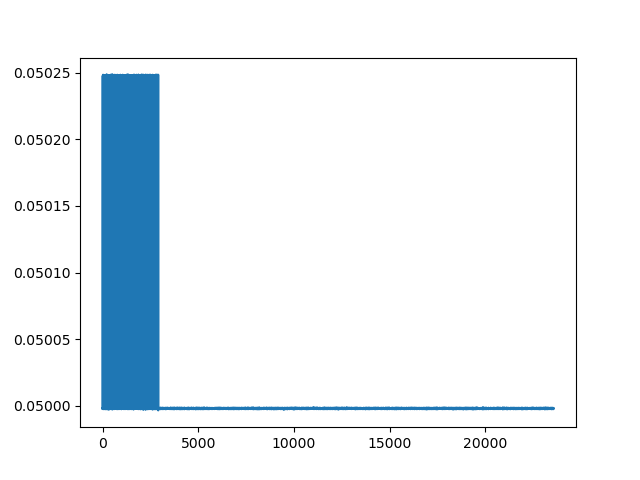

In [95]:
# Check the trend to see I can see the increasement or not
plt.figure()
plt.plot(diff_timestamps_filter)
plt.show()

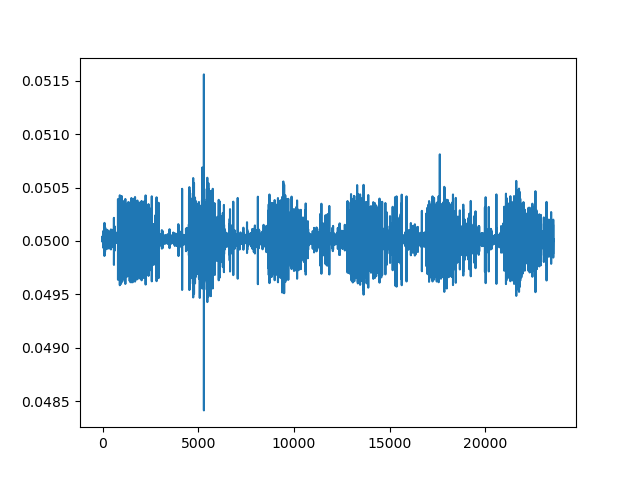

In [96]:
plt.figure()
plt.plot(diff_sndStamp_sal_filter)
plt.show()

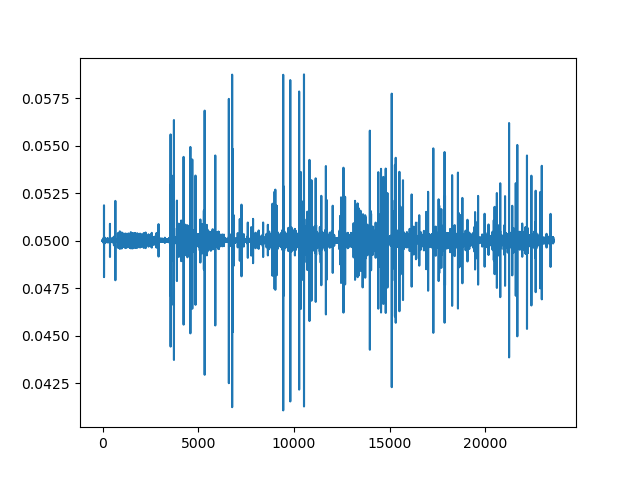

In [97]:
plt.figure()
plt.plot(diff_rcvStamp_sal_filter)
plt.show()

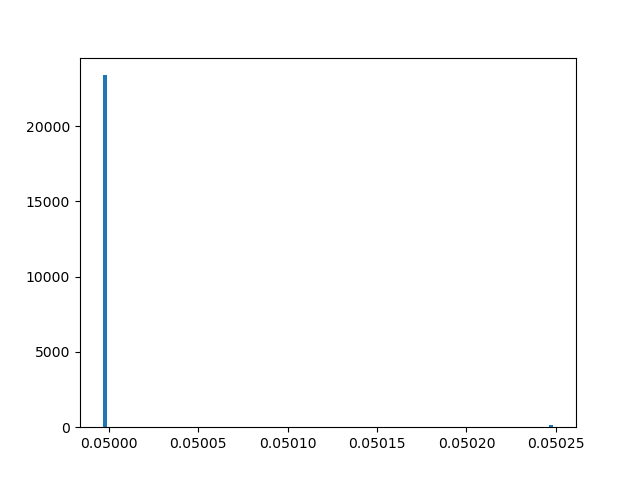

In [98]:
# The histogram of the data
plt.figure()
n, bins, patches = plt.hist(diff_timestamps_filter, bins=100)
plt.show()

In [99]:
std_timestamps = np.std(diff_timestamps_filter)
print(f"STD of timestamps is {std_timestamps} sec.")

print(f"The ratio to the expectation is {std_timestamps/0.05 * 100} %.")

STD of timestamps is 2.0723231840185418e-05 sec.
The ratio to the expectation is 0.04144646368037083 %.


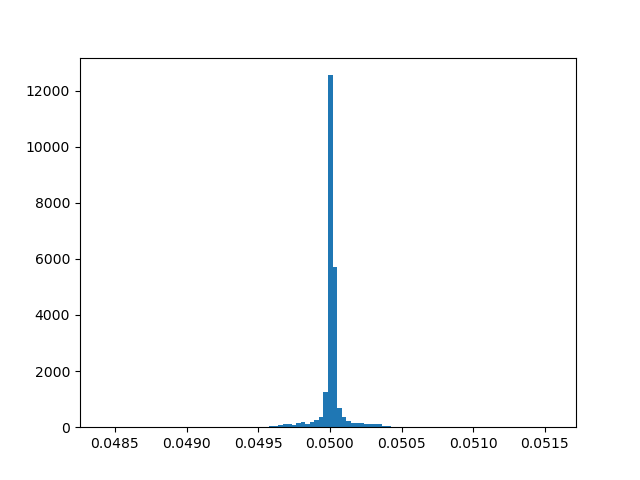

In [100]:
plt.figure()
n, bins, patches = plt.hist(diff_sndStamp_sal_filter, bins=100)
plt.show()

In [101]:
std_sndStamp = np.std(diff_sndStamp_sal_filter)
print(f"STD of SAL sending timestamps is {std_sndStamp} sec.")

print(f"The ratio to the expectation is {std_sndStamp/0.05 * 100} %.")

STD of SAL sending timestamps is 8.594600328987185e-05 sec.
The ratio to the expectation is 0.1718920065797437 %.


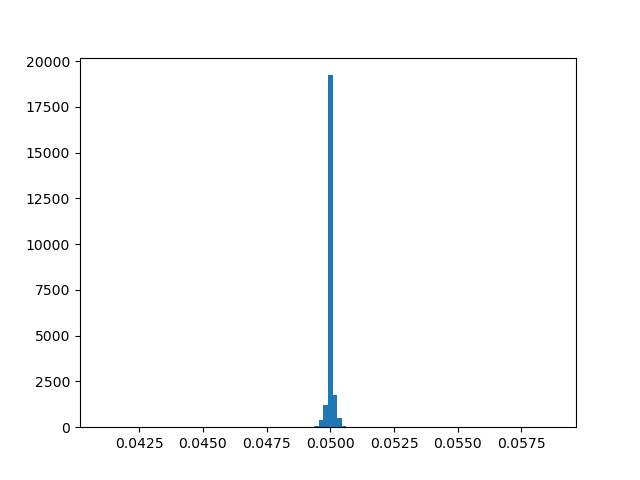

In [102]:
plt.figure()
n, bins, patches = plt.hist(diff_rcvStamp_sal_filter, bins=100)
plt.show()

In [103]:
std_rcvStamp = np.std(diff_rcvStamp_sal_filter)
print(f"STD of SAL receiving timestamps is {std_rcvStamp} sec.")

print(f"The ratio to the expectation is {std_rcvStamp/0.05 * 100} %.")

STD of SAL receiving timestamps is 0.00036573057643066 sec.
The ratio to the expectation is 0.7314611528613201 %.


In [67]:
plt.close('all')